In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read file
- data name : Spotify User Behavior Dataset
- data source : kaggle datasets  
  (https://www.kaggle.com/datasets/meeraajayakumar/spotify-user-behavior-dataset)

In [2]:
df = pd.read_excel('../data/Spotify_User_Behavoir/Spotify_data.xlsx')

In [3]:
print(df.shape)
df.head()

(520, 20)


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


### Check basic information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

- About Dataset:
1) Age - Age group of user?  
2) Gender - Gender of user?  
3) spotify_usage_period - How long have you been using Spotify?  
4) spotify_listening_device - Which of the following devices do you primarily use to listen to Spotify?  
5) spotify_subscription_plan - Which Spotify subscription plan do you currently have?  
6) premium_sub_willingness - Are you willing to take a premium subscription or willing to continue with premium subscription in future?  
7) preffered_premium_plan - If premium or willing to take premium, what amount do you pay for the subscription?  
8) preferred_listening_content - What do you prefer to listen more?  
9) fav_music_genre - What genre(s) of music do you enjoy the most?  
10) music_time_slot - What is your favourite time slot to listen to music?  
11) music_Influencial_mood - When it comes to listening to music, which of the following moods or situations most strongly influences your choice of music?
12) music_lis_frequency - When do you listen to music more often?  
13) music_expl_method - How do you discover new music on Spotify?  
14) music_recc_rating - How do you rate the spotify music recommendations?  
15) pod_lis_frequency - How often do you listen to Podcast?  
16) fav_pod_genre - What genre(s) of Podcast do you enjoy the most?  
17) preffered_pod_format - What podcast format you generally prefer?  
18) pod_host_preference - Are you more inclined to listen to podcasts from unknown personalities, or do you prefer podcasts hosted by well-known individuals? 
19) preffered_pod_duration - Do you prefer shorter podcast episodes (under 30 minutes) or longer episodes (over 30 minutes)?  
20) pod_variety_satisfaction - Are you satisfied with the variety and availability of podcasts on Spotify?  

- Check unique values for each column

In [5]:
for column in df.columns:
    print(f"Column Name: {column}")
    print("isnull count : ", df[column].isnull().sum())
    print(df[column].value_counts())
    print("-"*100)
    print("-"*100)

Column Name: Age
isnull count :  0
Age
20-35    422
12-20     71
35-60     23
6-12       3
60+        1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Column Name: Gender
isnull count :  0
Gender
Female    391
Male      114
Others     15
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Column Name: spotify_usage_period
isnull count :  0
spotify_usage_period
More than 2 years     169
1 year to 2 years     141
6 months to 1 year    119
Less than 6 months     91
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
-------------------------------------------------

### EDA

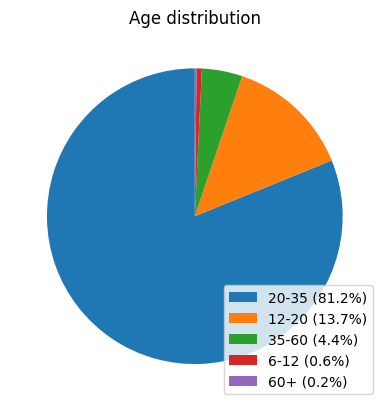

In [6]:
col_name = "Age"
x = df[col_name].value_counts()

ratios = [f"{val/sum(x)*100:.1f}%" for val in x]
labels = [f"{index} ({ratio})" for index, ratio in zip(x.index, ratios)]

plt.pie(x, labels=None, autopct='', startangle=90)
plt.title(f"{col_name} distribution")
plt.legend(labels=labels, loc="lower right")

plt.show()

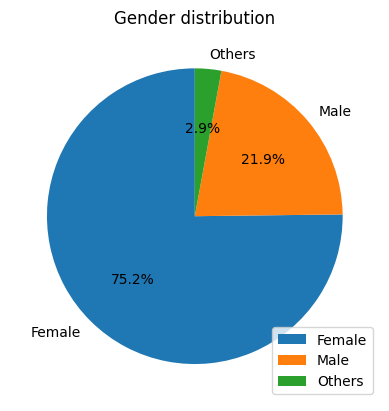

In [7]:
col_name = "Gender"
x = df[col_name].value_counts()

plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90)

plt.legend(loc='lower right')
plt.title(f"{col_name} distribution")

plt.show()

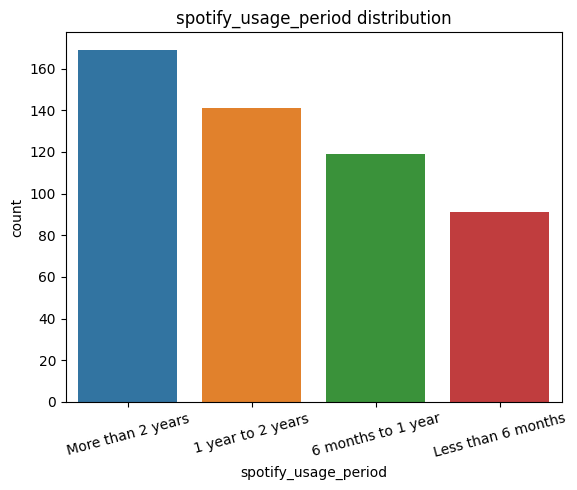

In [8]:
col_name = "spotify_usage_period"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

- For columns that allow multiple responses,  
  each response was separated and counted individually.

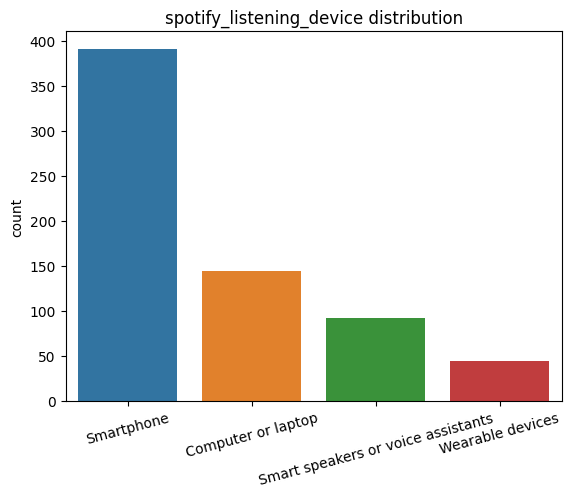

In [9]:
col_name = "spotify_listening_device"

all_responses = []
for response in df[col_name]:
    all_responses.extend([item.strip() for item in response.split(',')])

each_count = pd.Series(all_responses).value_counts()

sns.countplot(x=all_responses, order=each_count.index)

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

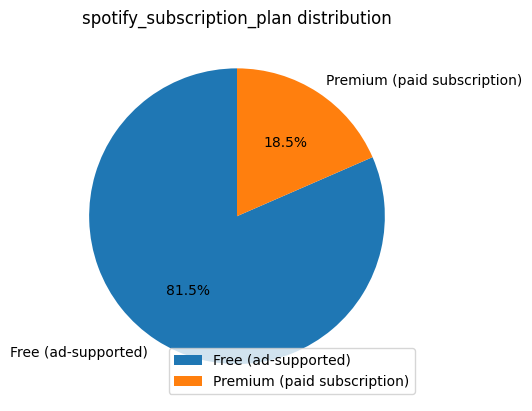

In [10]:
col_name = "spotify_subscription_plan"
x = df[col_name].value_counts()

plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90)

plt.legend(loc='lower right')
plt.title(f"{col_name} distribution")

plt.show()

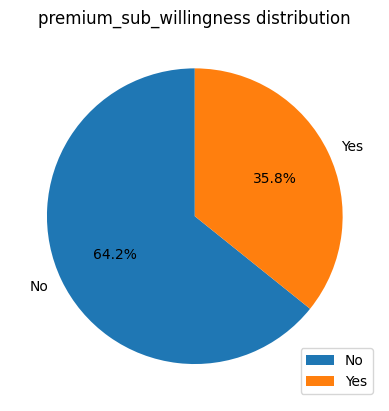

In [11]:
col_name = "premium_sub_willingness"
x = df[col_name].value_counts()

plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=90)

plt.legend(loc='lower right')
plt.title(f"{col_name} distribution")

plt.show()

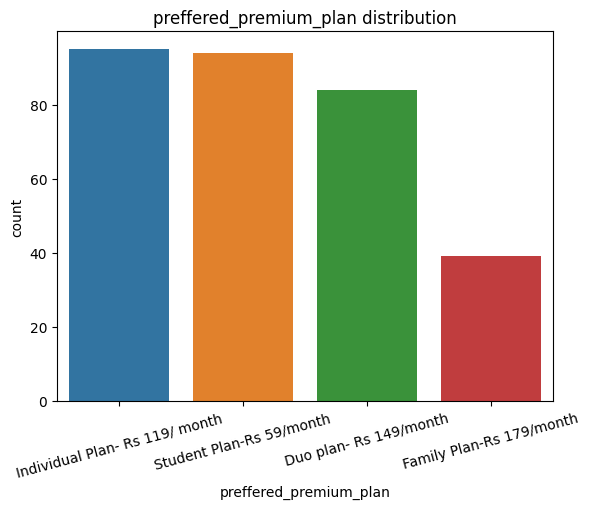

In [12]:
col_name = "preffered_premium_plan"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

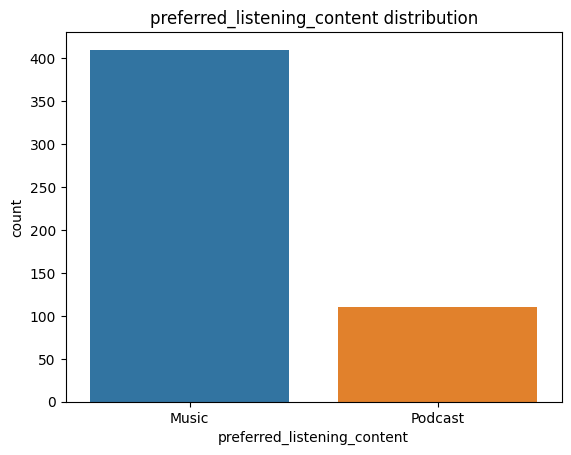

In [13]:
col_name = "preferred_listening_content"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

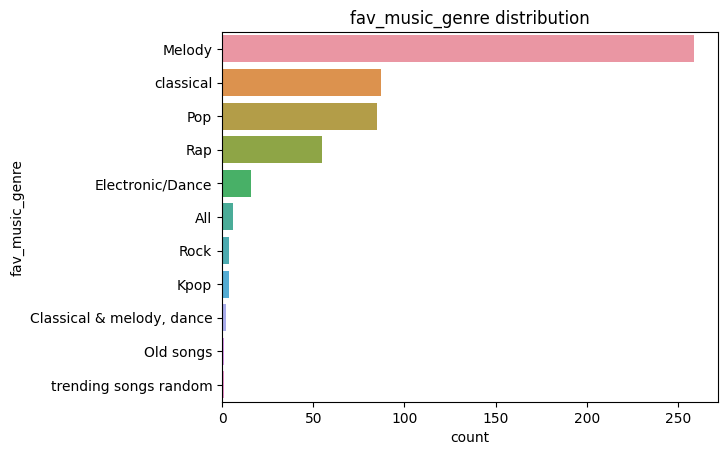

In [14]:
col_name = "fav_music_genre"
order = df[col_name].value_counts().index

sns.countplot(y=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

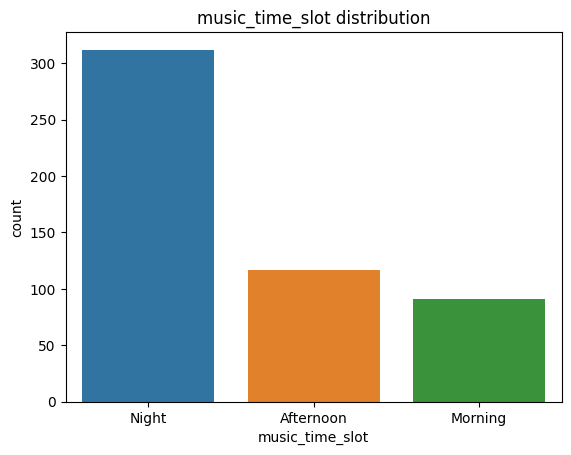

In [15]:
col_name = "music_time_slot"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

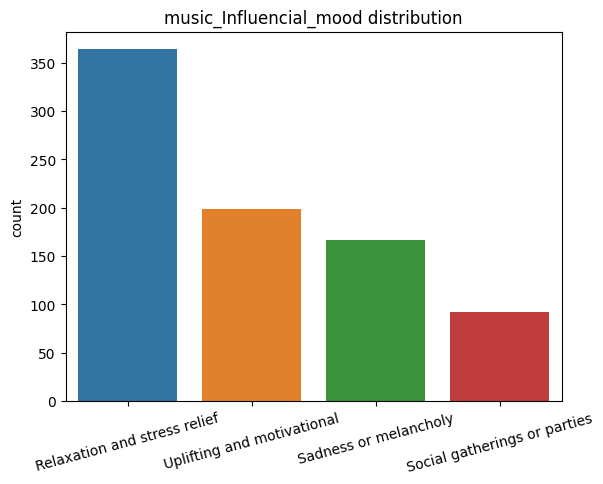

In [16]:
col_name = "music_Influencial_mood"

all_responses = []
for response in df[col_name]:
    all_responses.extend(response.split(', '))

each_count = pd.Series(all_responses).value_counts()

sns.countplot(x=all_responses, order=each_count.index)

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

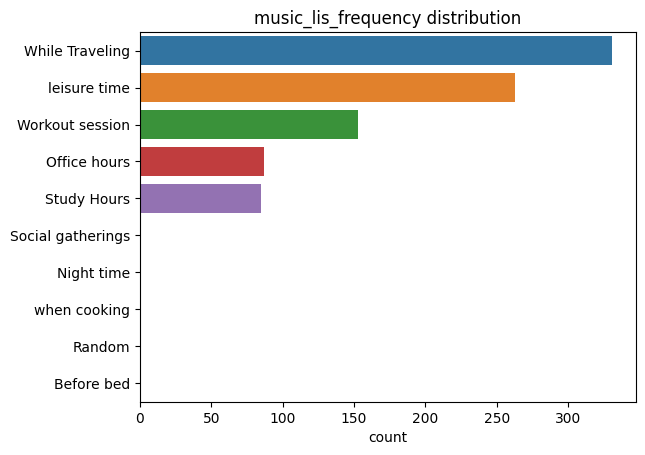

In [17]:
col_name = "music_lis_frequency"

all_responses = []
for response in df[col_name]:
    all_responses.extend([item.strip() for item in response.split(',')])

all_responses = [response for response in all_responses if response != ""]

each_count = pd.Series(all_responses).value_counts()

sns.countplot(y=all_responses, order=each_count.index)

plt.title(f"{col_name} distribution")

plt.show()

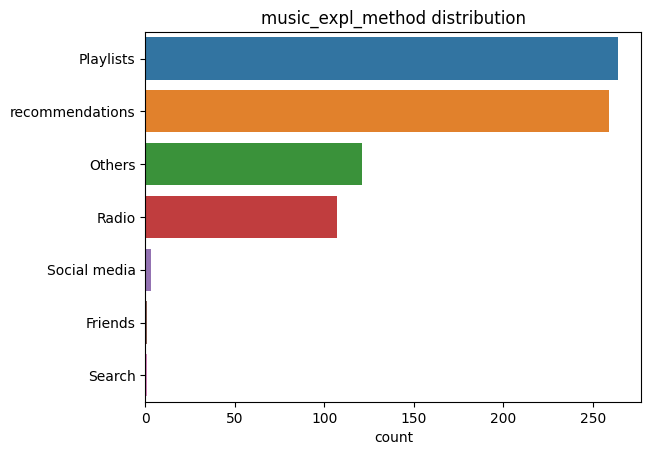

In [18]:
col_name = "music_expl_method"

all_responses = []
for response in df[col_name]:
    all_responses.extend([item.strip() for item in response.split(',')])

each_count = pd.Series(all_responses).value_counts()

sns.countplot(y=all_responses, order=each_count.index)

plt.title(f"{col_name} distribution")

plt.show()

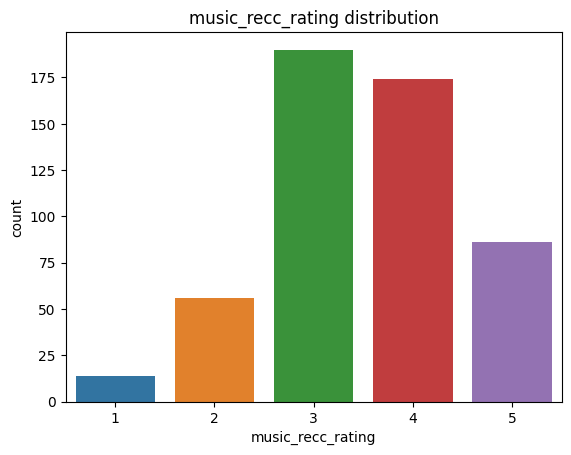

In [19]:
col_name = "music_recc_rating"
order = [1, 2, 3, 4, 5]

sns.countplot(x=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

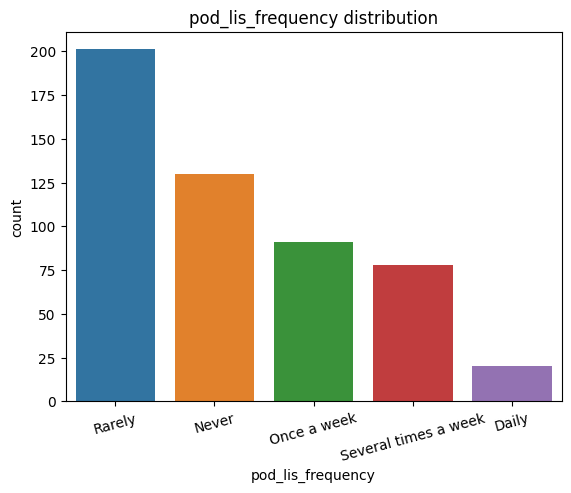

In [20]:
col_name = "pod_lis_frequency"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()

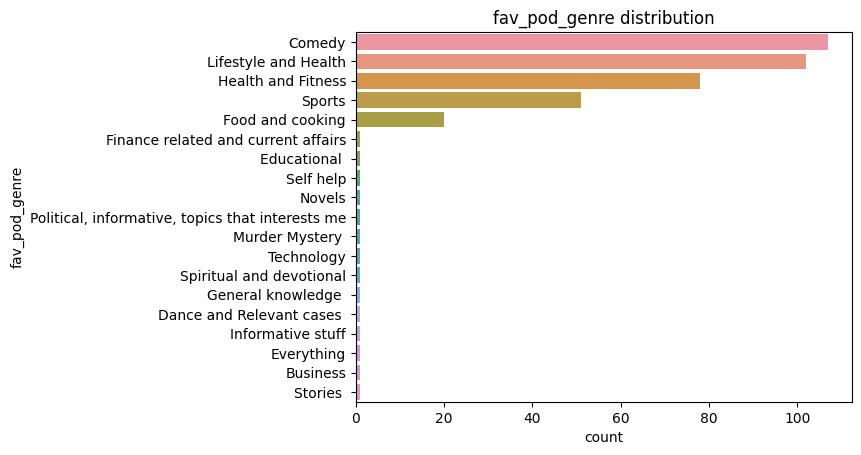

In [21]:
col_name = "fav_pod_genre"
order = df[col_name].value_counts().index

sns.countplot(y=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

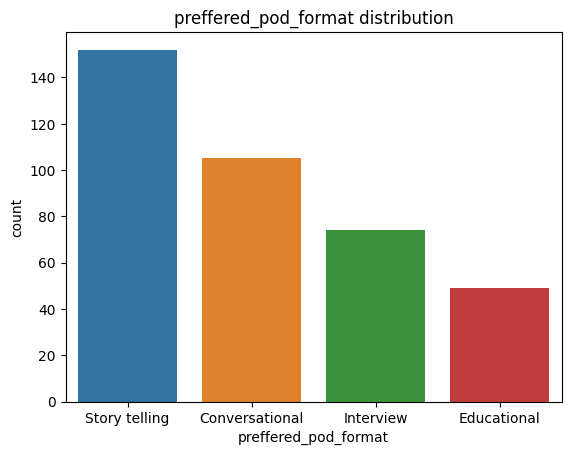

In [22]:
col_name = "preffered_pod_format"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

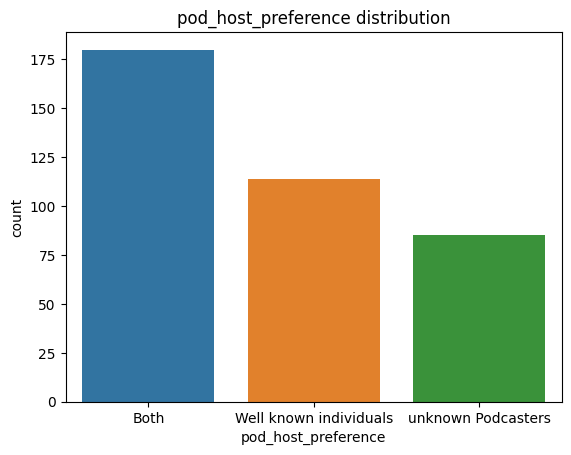

In [23]:
col_name = "pod_host_preference"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

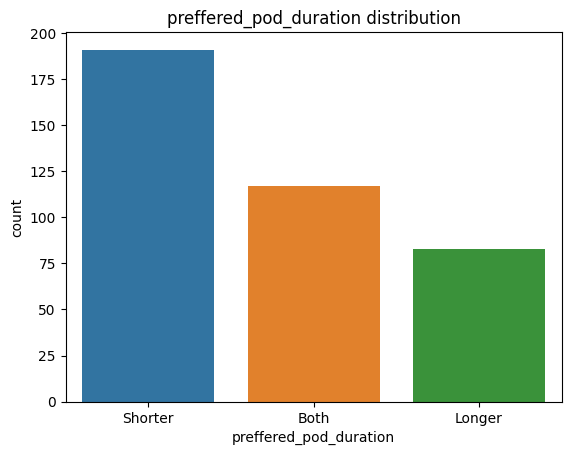

In [24]:
col_name = "preffered_pod_duration"
order = df[col_name].value_counts().index

sns.countplot(x=col_name, data=df, order=order)

plt.title(f"{col_name} distribution")

plt.show()

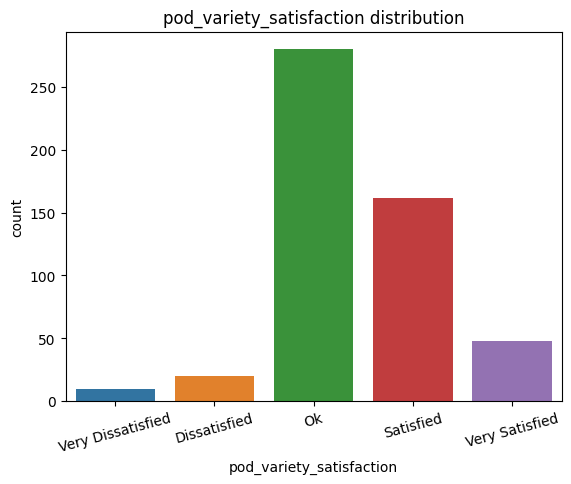

In [25]:
col_name = "pod_variety_satisfaction"
order = ['Very Dissatisfied', 'Dissatisfied', 'Ok', 'Satisfied', 'Very Satisfied']

sns.countplot(x=col_name, data=df, order=order)

plt.xticks(rotation=15)
plt.title(f"{col_name} distribution")

plt.show()